Maintenance of distribution transformers

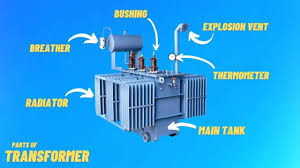







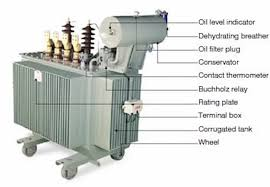


Dataset Description : \
 Dataset contains 16.000 electric power distribution transformers from Cauca Department (Colombia).\
They are distributed in rural and urban areas of 42 municipalities. The information covers 2019 and 2020 years, has 6 categorical variables and 5 continuous variables.\
First ones correspond to:
location, self-protected, removable connector, criticality according to ceraunic level, client and
installation type.\
Second ones are transformer power, burn rate, users number, unsupplied electricity and secondary lines length.


> Dataset of distribution transformers are connected to the operator’s network at voltage levels of 13.2 [kV] and 34.5 [kV], located in rural and urban areas at Cauca Department (Colombia).

# Predictive-maintanance-of-Distribution-Transformers-


1. Data Description
   
The dataset consists in two archives in Excel: \n

(i) Dataset_Year_2019.xlsx   \

(ii) Dataset_Year_2020.xlsx   \

Each file has 16 columns with the information of characteristics of distribution transformers at Cauca Department during 2019 and 2020 years, columns in order ascendent are: \n

A.Location: Binary variable that indicates the area in which the transformer is located: 1 if it is urban and 0 if it is rural. \n

B.Power: Transformer capacity in [kVA]. For transformers immersed in oil the standard IEC 76-1 eestablishes normal service conditions as altitude above sea level no higher than 1000 [m] and room temperature higher than and less than . \n

C.Self-protection: Binary variable that indicates if the transformer has a switch internally for low voltage protection: 1 if it is self-protected and 0 if it is not. \n

D.Average earth discharge density DDT: Variable in is defined as the average number of lightning strikes per square kilometer in a year. \n

E. Maximum ground discharge density DDT: Variable in is defined as the maximum number of lightning strikes per square kilometer in a year. \n

F. Burning rate: Variable based on the reliability of the system and calculated from the failure events recorded in the years of study. It is defined as the number of failures of a component per unit of recording time. \n

G. Criticality according to previous study for ceramics level: Binary variable product of the result of a previous study carried out for the distribution company by third parties: 1 if due to its geographical location it is at high risk and 0 otherwise, it does not present high risk. \n

H.Removable connectors: Binary variable that indicates if the transformer installation has removable medium voltage connectors to carry out interventions without the need to open from the disconnector immediately upstream: 1 if it has the removable connectors installed and 0 if it does not. \n

I.Type of clients: Categorical variable that indicates whether the transformer mainly feeds stratum 1, 2, 3, 4, 5, 6, commercial, industrial or official residential users. \n

J.Number of users: Integer variable that indicates how many customers the transformer in question is supplying the electric power service. \n

K.Electric power not supplied EENS: Variable based on the risk involved in the failure, represents the [kWh] that the distribution company stops selling when the transformer stops operating due to a failure event. \n

L.Type of installation: Categorical variable that indicates whether the installed transformer is in a cabin, in a H-type structure, if it has a macro with an anti-fraud net, if it is a pad mounted type, if it is in a simple pole-type structure, an anti-fraud net pole, a metal tower or others. \n

M.Air network: Binary variable that indicates whether the transformers low voltage network is of the aerial type: 1 if it is indeed and 0 otherwise. \n

N.Circuit Queue: Binary variable that indicates if the transformer is located within the medium voltage network at a terminal point of the circuit: 1 if it is in the queue and 0 if it is in a passing point. \n

O.km of network LT: Continuous variable that corresponds to the length in [km] of the low voltage transformer. \n

P. Burned transformers: Binary variable that indicates if the transformer has been burned during this year: 1 if it is burned and 0 otherwise. \n

In [2]:
!apt install nvidia-cuda-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java libatk-wrapper-java-jni
  libbabeltrace1 libcub-dev libcublas11 libcublaslt11 libcudart11.0 libcufft10 libcufftw10
  libcuinj64-11.5 libcupti-dev libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libegl-dev libfontenc1 libgail-common libgail18
  libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglvnd-core-dev libglvnd-dev libglx-dev
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libipt2 libnppc11 libnppial11 libnppicc11 libnppidei11
  libnppif11 libnppig11 libnppim11 libnppist11 libnppisu11 libnppitc11 libnpps11 libnvblas11
  libnvidia-compute-495 libnvidia-compute-510 libnvidia-compute-535 libnvidia-ml-dev libnvjpeg11
  libnvrtc-builtins11.5 libnvrtc11.2 libnvtoolsext1 libnvvm4 libopengl-dev libr

In [4]:
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64'
os.environ['PATH'] = '/usr/local/cuda/bin:' + os.environ['PATH']

Improting Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# %load_ext cudf.pandas

In [2]:
# importing Data
df_19 = pd.read_excel('Dataset_Year_2019.xlsx')
df_20 = pd.read_excel('Dataset_Year_2020.xlsx')

In [3]:
df_19.sample(10)

,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformers 2019
3077,1,112.5,0,4.148532,8.3,0.00,0,1,COMMERCIAL,1,3037.5,POLE,1,1,0.00000,0
12091,0,25.0,0,0.437789,2.4,0.25,0,1,STRATUM 1,20,405.0,POLE,1,0,0.74950,0
441,1,45.0,0,3.155602,6.6,0.00,0,1,STRATUM 5,18,729.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.00000,0
543,1,75.0,0,3.155602,6.6,0.00,0,1,STRATUM 5,8,1215.0,MACRO WITHOUT ANTI-FRAUD NET,1,1,0.57940,0
14925,0,15.0,0,0.856320,3.1,0.25,0,1,STRATUM 1,19,243.0,POLE,1,0,2223.00000,0
8304,0,37.5,0,1.351333,6.1,0.00,0,0,STRATUM 1,45,777.6,POLE,1,1,29983.00000,0
12981,0,10.0,0,1.104394,4.9,0.00,0,0,STRATUM 1,1,359.1,POLE,1,0,0.20271,0
3006,0,5.0,0,1.039696,4.3,0.50,0,1,STRATUM 1,7,81.0,POLE,1,0,0.70050,0
9528,0,25.0,0,2.160302,4.9,0.00,1,0,STRATUM 1,9,561.6,POLE,1,1,0.59833,0
58,1,75.0,0,3.155602,6.6,0.00,0,1,STRATUM 1,27,1215.0,POLE WITH ANTI-FRAUD NET,1,1,0.14071,0


In [4]:

df_20.sample(10)

,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformers 2020
8025,0,10.0,0,0.856320,3.1,0.2,0,1,STRATUM 1,8,162.0,POLE,1,0,247252.00000,0
12759,0,10.0,0,0.321040,1.3,0.0,0,0,STRATUM 1,3,585.9,POLE,1,1,0.83940,0
10737,0,15.0,0,0.437789,2.4,0.0,0,0,STRATUM 1,1,302.4,POLE,1,1,0.29377,0
2138,0,10.0,0,1.039696,4.3,0.2,0,1,STRATUM 1,14,162.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.61387,0
8094,0,10.0,0,0.645050,2.4,0.0,0,0,STRATUM 1,2,237.6,POLE,1,0,0.15925,0
10668,0,15.0,0,5.259563,11.9,0.0,1,1,STRATUM 1,12,243.0,POLE,1,0,0.99600,0
13172,0,45.0,0,0.437789,2.4,0.0,0,0,STRATUM 1,124,1067.4,POLE,1,0,0.25954,0
3751,0,45.0,0,1.039696,4.3,0.0,1,0,INDUSTRIAL,1,1663.2,POLE,1,0,0.00000,0
15726,1,25.0,0,4.148532,8.3,0.0,0,1,COMMERCIAL,1,675.0,POLE,1,1,0.00000,0
13911,0,5.0,0,1.351333,6.1,0.2,0,1,STRATUM 1,7,81.0,POLE,1,0,215451.00000,0


In [5]:
print(df_19.shape , df_20.shape)

(15873, 16) (15873, 16)


In [6]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    15873 non-null  int64  
 1   POWER                                                       15873 non-null  float64
 2   SELF-PROTECTION                                             15873 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         15873 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        15873 non-null  float64
 5   Burning rate  [Failures/year]                               15873 non-null  float64
 6   Criticality according to previous study for ceramics level  15873 non-null  int64  
 7   Removable connectors                                        15873 non-null  int64  
 

In [7]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    15873 non-null  int64  
 1   POWER                                                       15873 non-null  float64
 2   SELF-PROTECTION                                             15873 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         15873 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        15873 non-null  float64
 5   Burning rate  [Failures/year]                               15873 non-null  float64
 6   Criticality according to previous study for ceramics level  15873 non-null  int64  
 7   Removable connectors                                        15873 non-null  int64  
 

combining the 2 dataframes

In [10]:
df_19['Year']=2019
df_20['Year']=2020

In [8]:
df_19 =df_19.rename(columns={'Burned transformers 2019':'Burned transformer'})
df_20 =df_20.rename(columns={'Burned transformers 2020':'Burned transformer'})

In [11]:
combined_df = pd.concat([df_19, df_20], ignore_index=True)

In [13]:
combined_df

,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformer,Year
0,1,112.5,0,3.155602,6.6,0.0,0,1,STRATUM 2,94,1822.5,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.32362,0,2019
1,1,10.0,0,3.155602,6.6,0.0,0,1,OFFICIAL,1,270.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.30036,0,2019
2,1,25.0,0,3.155602,6.6,0.0,0,1,STRATUM 2,74,405.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.29695,0,2019
3,1,75.0,0,3.155602,6.6,0.0,0,1,STRATUM 6,30,1215.0,MACRO WITHOUT ANTI-FRAUD NET,1,0,0.12575,0,2019
4,1,75.0,0,3.155602,6.6,0.0,0,1,STRATUM 4,24,1215.0,MACRO WITHOUT ANTI-FRAUD NET,1,1,0.16605,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31741,0,37.5,0,3.155602,6.6,0.0,0,0,STRATUM 1,30,796.5,POLE,1,0,0.80303,0,2020
31742,0,37.5,0,4.148532,8.3,0.2,0,1,STRATUM 1,57,607.5,POLE,1,0,146419.00000,0,2020
31743,0,25.0,0,3.850980,6.1,0.0,0,0,STRATUM 1,21,855.0,POLE,1,1,0.73990,0,2020
31744,0,10.0,0,0.717021,2.5,0.0,1,1,STRATUM 1,10,162.0,POLE,1,0,176708.00000,0,2020


## EDA

In [15]:
df_20['POWER'].unique()

array([ 112.5,   10. ,   25. ,   75. ,   30. ,   45. , 1125. ,  150. ,
         15. ,   50. ,  125. ,  225. ,   37.5,  300. ,    5. ,  200. ,
        100. ,  630. ,  400. ,   20. , 1000. , 1250. , 2000. ,  250. ,
        500. ])

In [ ]:
df_20['Type of clients'].unique()

array(['STRATUM 2', 'OFFICIAL', 'STRATUM 6', 'STRATUM 4', 'STRATUM 1',
       'STRATUM 3', 'STRATUM 5', 'COMMERCIAL', 'INDUSTRIAL'], dtype=object)

In [ ]:
df_20['Type of installation'].unique()

array(['MACRO WITHOUT ANTI-FRAUD NET', 'POLE', 'POLE WITH ANTI-FRAU NET',
       'EN H', 'PAD MOUNTED', 'TORRE METALICA', 'OTROS', 'CABINA'],
      dtype=object)

In [ ]:
df_20['Type of clients'].value_counts()

,count
Type of clients,
STRATUM 1,13370
STRATUM 2,1120
STRATUM 3,427
COMMERCIAL,338
STRATUM 4,327
INDUSTRIAL,119
STRATUM 5,88
OFFICIAL,66
STRATUM 6,18


Univariate Analysis

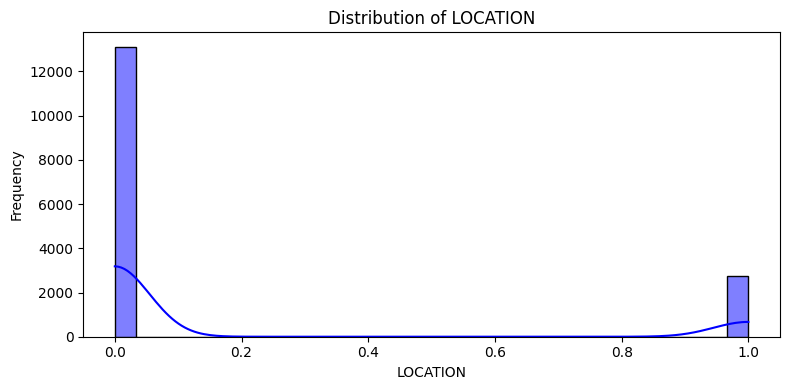

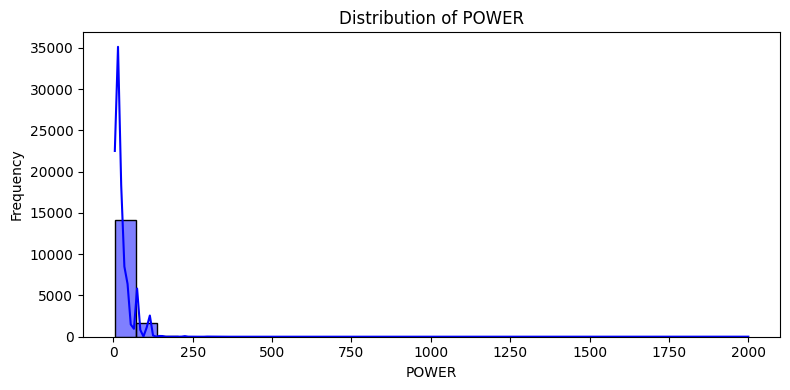

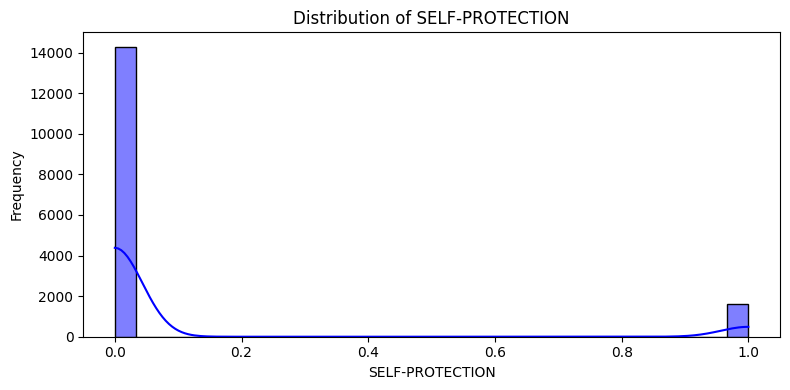

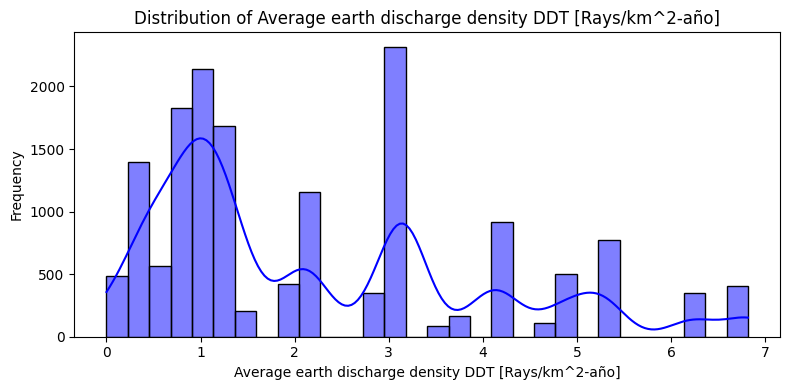

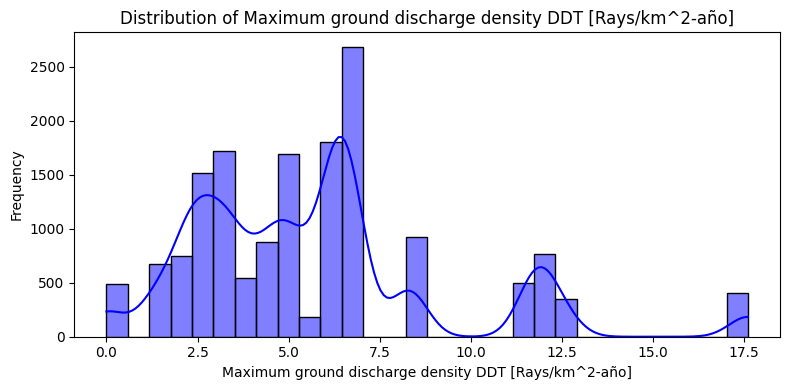

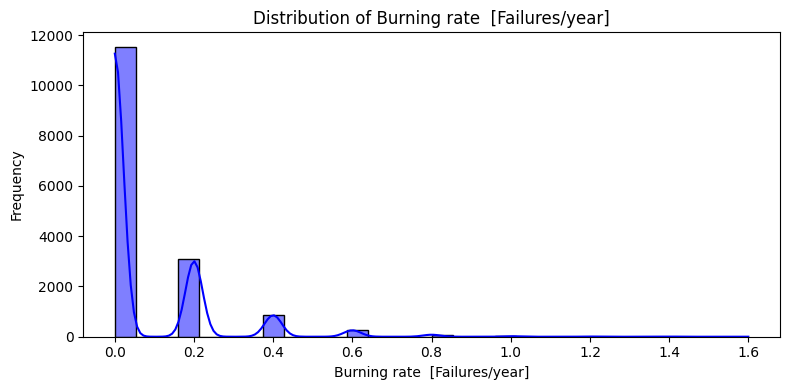

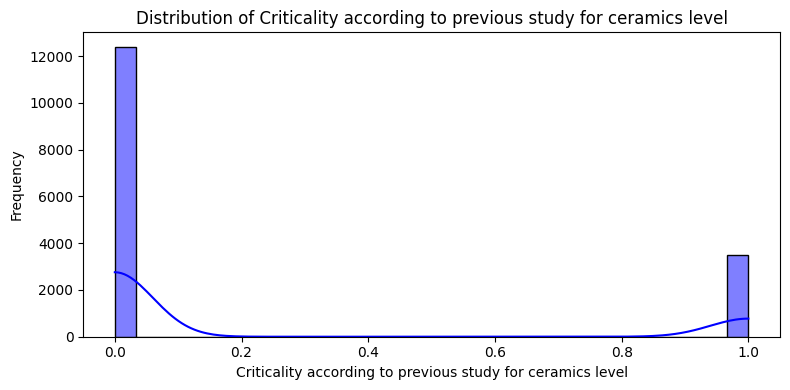

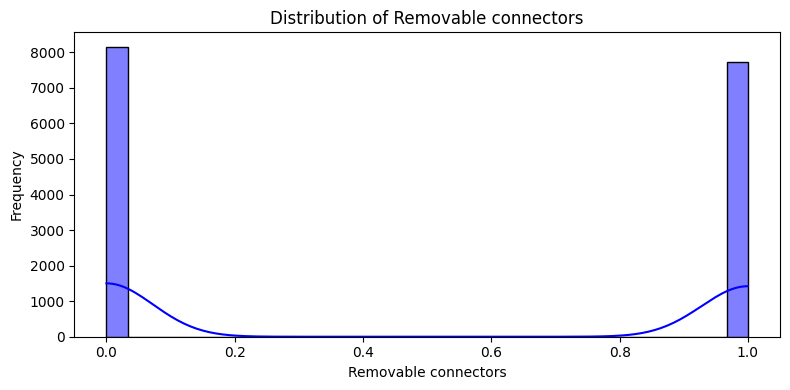

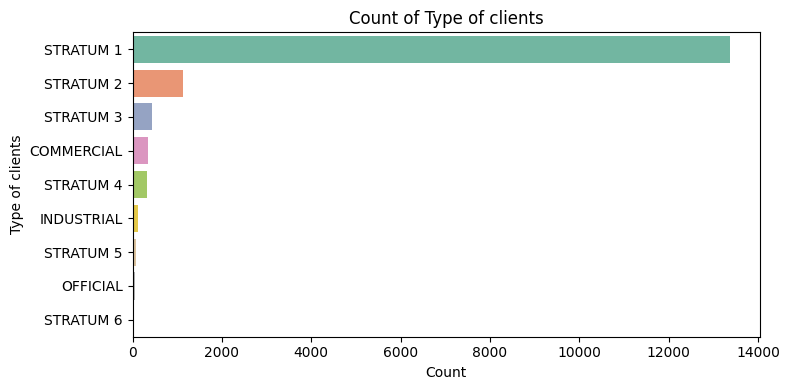

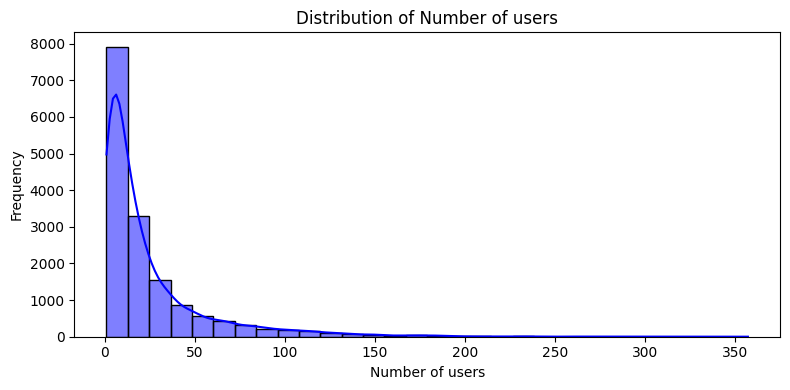

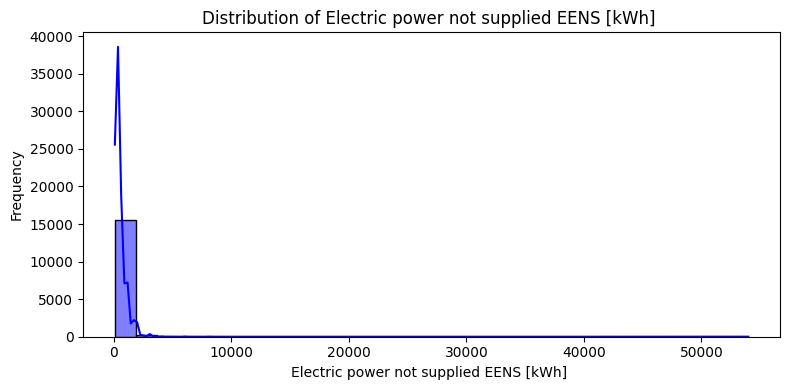

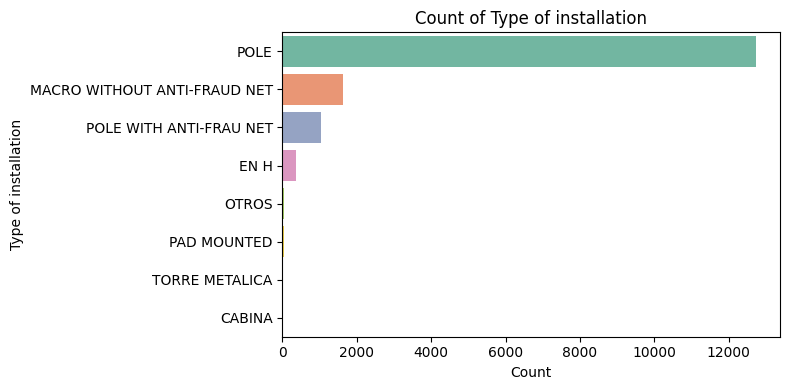

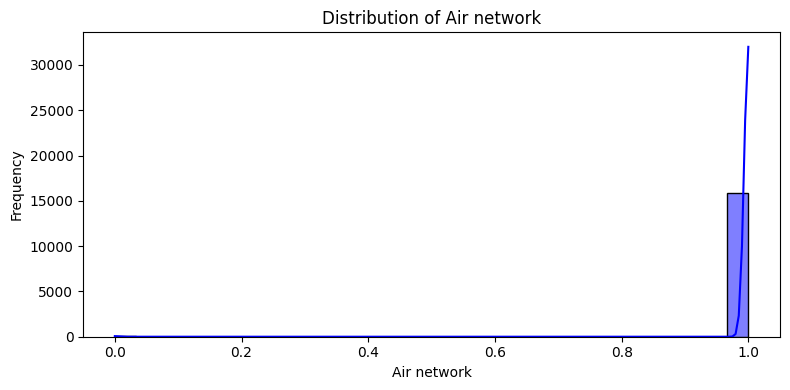

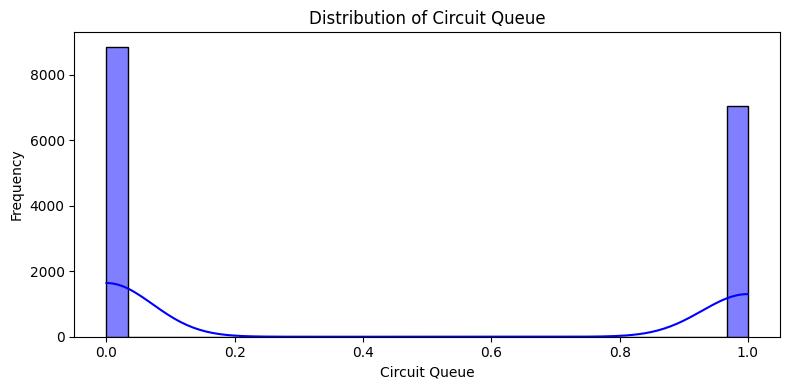

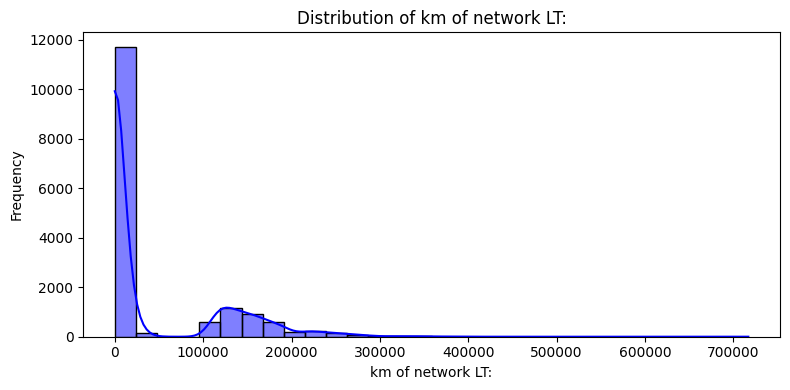

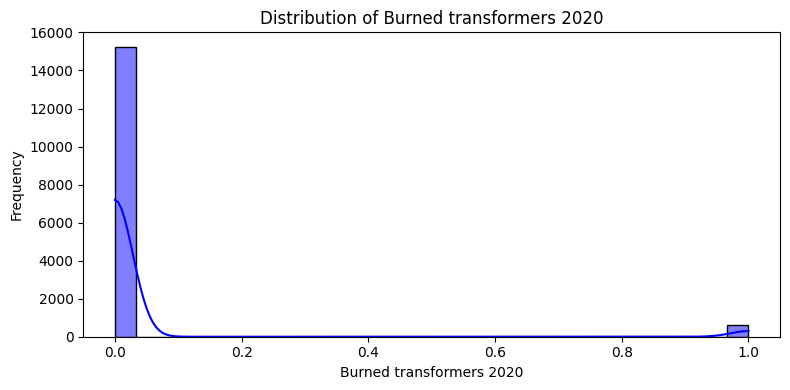

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine your two datasets if needed, otherwise work with a single dataset
# df = pd.concat([df_19, df_20])

# Function to generate univariate plots
def univariate_plots(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(8, 4))
        if dataframe[column].dtype in ['int64', 'float64']:  # Numerical columns
            sns.histplot(dataframe[column], kde=True, bins=30, color='blue')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        elif dataframe[column].dtype == 'object':  # Categorical columns
            sns.countplot(y=dataframe[column], palette='Set2', order=dataframe[column].value_counts().index)
            plt.title(f'Count of {column}')
            plt.xlabel('Count')
            plt.ylabel(column)
        plt.tight_layout()
        plt.show()

# Call the function on your dataframe
univariate_plots(df_20)


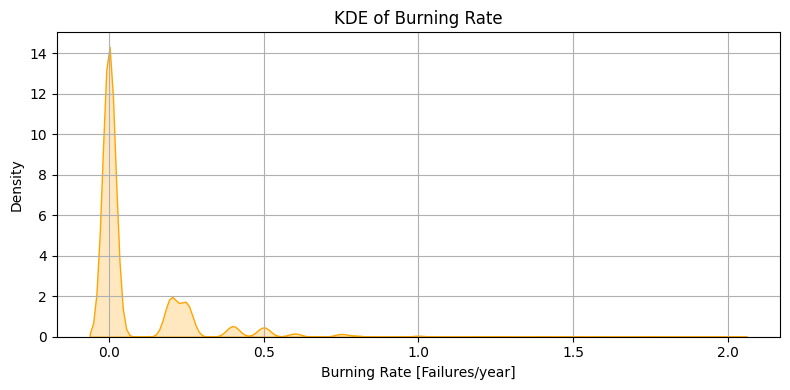

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot KDE for smooth distribution
plt.figure(figsize=(8, 4))
sns.kdeplot(combined_df['Burning rate  [Failures/year]'], shade=True, color='orange')
plt.title('KDE of Burning Rate')
plt.xlabel('Burning Rate [Failures/year]')
plt.grid(True)
plt.tight_layout()
plt.show()


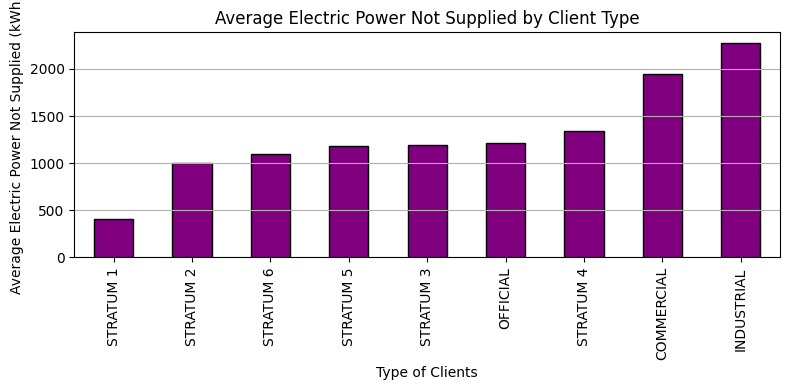

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate and plot (e.g., average of 'Electric power not supplied EENS')
plt.figure(figsize=(8, 4))
combined_df.groupby('Type of clients')['Electric power not supplied EENS [kWh] '].mean().sort_values().plot(
    kind='bar', color='purple', edgecolor='black'
)
plt.title('Average Electric Power Not Supplied by Client Type')
plt.xlabel('Type of Clients')
plt.ylabel('Average Electric Power Not Supplied (kWh)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


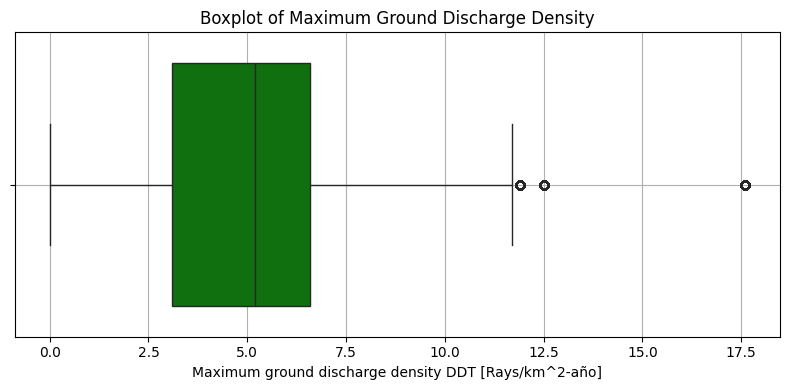

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for numerical column to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=combined_df['Maximum ground discharge density DDT [Rays/km^2-año]'], color='green')
plt.title('Boxplot of Maximum Ground Discharge Density')
plt.xlabel('Maximum ground discharge density DDT [Rays/km^2-año]')
plt.grid(True)
plt.tight_layout()
plt.show()


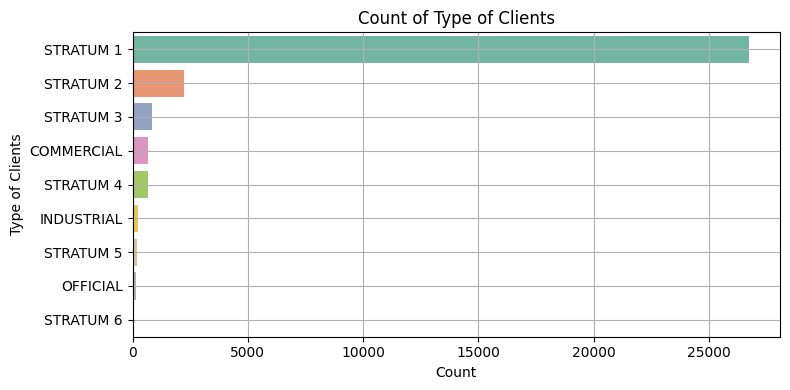

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for categorical column
plt.figure(figsize=(8, 4))
sns.countplot(y=combined_df['Type of clients'], palette='Set2', order=combined_df['Type of clients'].value_counts().index)
plt.title('Count of Type of Clients')
plt.xlabel('Count')
plt.ylabel('Type of Clients')
plt.grid(True)
plt.tight_layout()
plt.show()


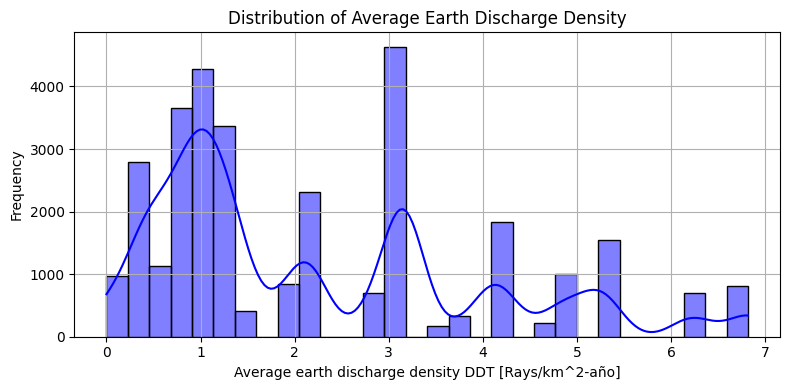

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for numerical column
plt.figure(figsize=(8, 4))
sns.histplot(combined_df['Average earth discharge density DDT [Rays/km^2-año]'], kde=True, bins=30, color='blue')
plt.title('Distribution of Average Earth Discharge Density')
plt.xlabel('Average earth discharge density DDT [Rays/km^2-año]')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
df=combined_df

starts from here ++++

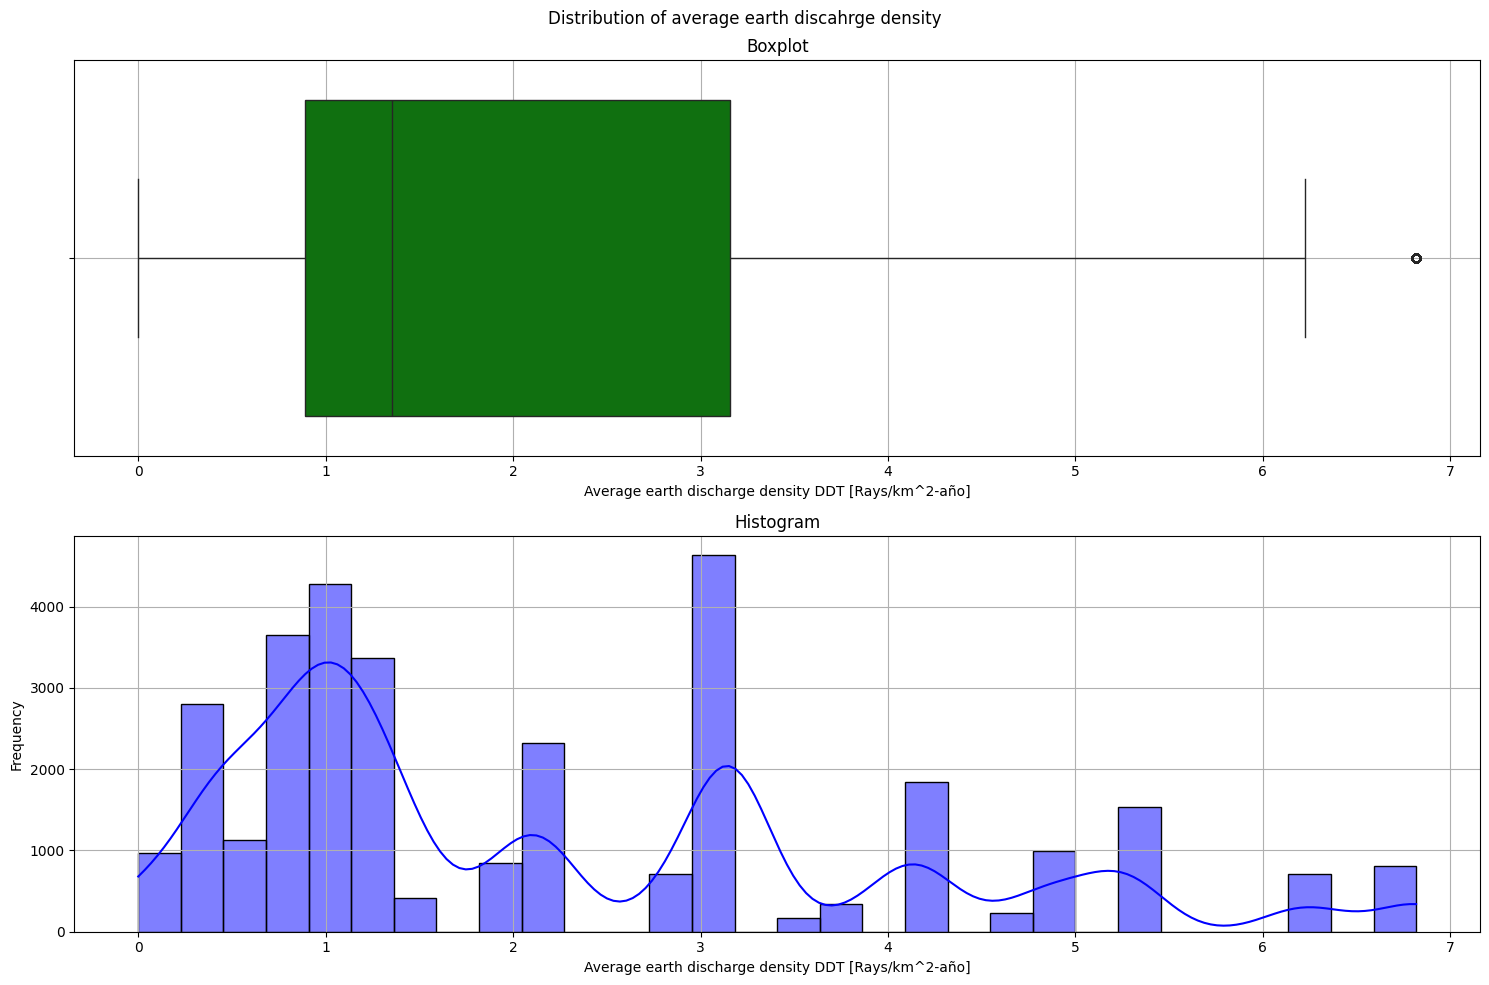

In [61]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Boxplot
sns.boxplot(data=df, x='Average earth discharge density DDT [Rays/km^2-año]', ax=axs[0], color='green')
axs[0].set_title('Boxplot')
axs[0].set_xlabel('Average earth discharge density DDT [Rays/km^2-año]')
axs[0].grid(True)

# Histogram
sns.histplot(data=df, x='Average earth discharge density DDT [Rays/km^2-año]', kde=True, bins=30, color='blue', ax=axs[1])
axs[1].set_title('Histogram')
axs[1].set_xlabel('Average earth discharge density DDT [Rays/km^2-año]')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.suptitle('Distribution of average earth discahrge density')

# Adjust layout
plt.tight_layout()
plt.show()


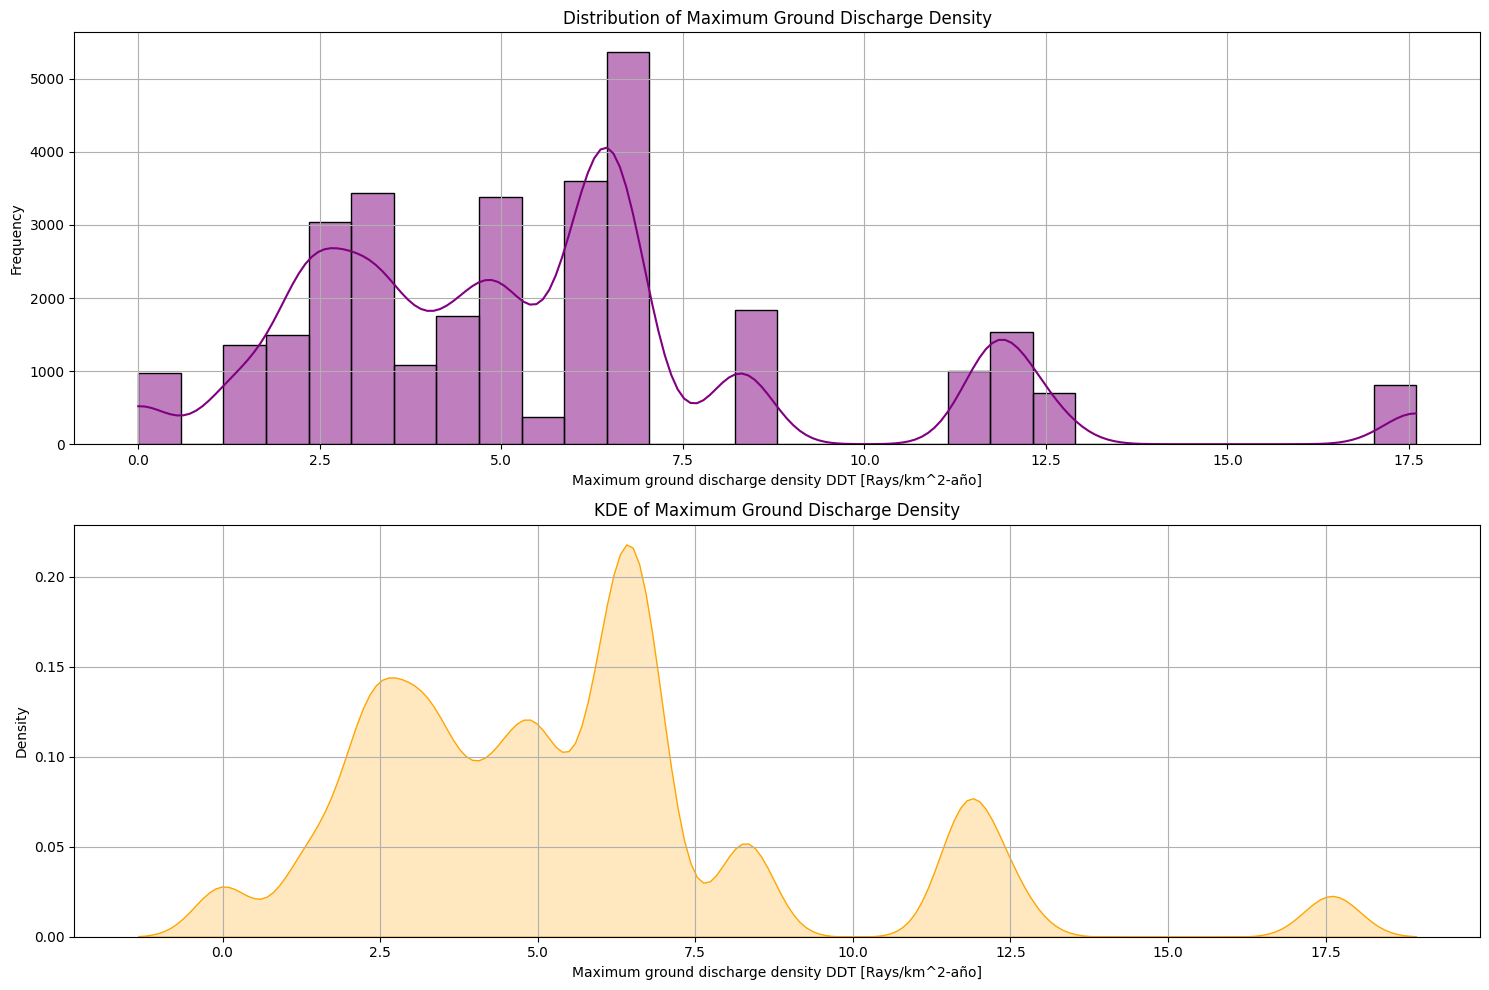

In [65]:
# Maximum ground discharge density DDT [Rays/km^2-año]

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

#Histogram
sns.histplot(df['Maximum ground discharge density DDT [Rays/km^2-año]'], kde=True, bins=30, color='purple',ax=axs[0])
axs[0].set_title('Distribution of Maximum Ground Discharge Density')
axs[0].set_xlabel('Maximum ground discharge density DDT [Rays/km^2-año]')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)




# KDE plot
sns.kdeplot(df['Maximum ground discharge density DDT [Rays/km^2-año]'], shade=True, color='orange',ax=axs[1])
axs[1].set_title('KDE of Maximum Ground Discharge Density')
axs[1].set_xlabel('Maximum ground discharge density DDT [Rays/km^2-año]')
axs[1].grid(True)


plt.tight_layout()
plt.show()

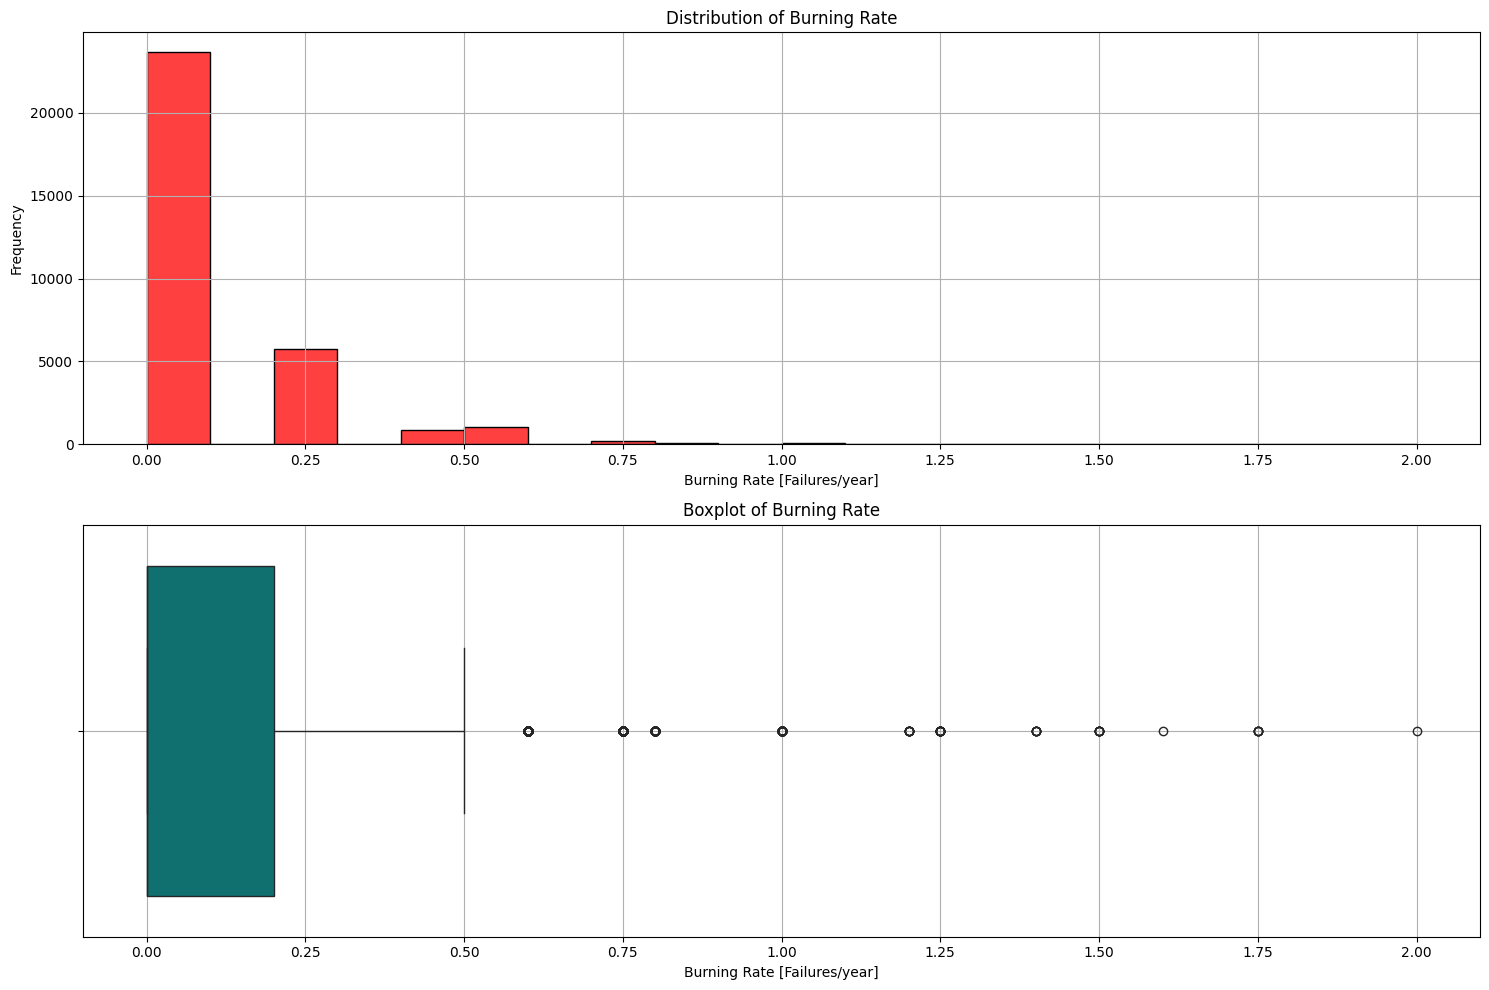

In [67]:
#Burning rate [Failures/year]

fig,axs=plt.subplots(2,1,figsize=(15,10))

#Hisplotaxs[0]
sns.histplot(df['Burning rate  [Failures/year]'], kde=False, bins=20, color='red',ax=axs[0])
axs[0].set_title('Distribution of Burning Rate')
axs[0].set_xlabel('Burning Rate [Failures/year]')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)


# Boxplot
sns.boxplot(x=df['Burning rate  [Failures/year]'], color='teal',ax=axs[1])
axs[1].set_title('Boxplot of Burning Rate')
axs[1].set_xlabel('Burning Rate [Failures/year]')
axs[1].grid(True)

plt.tight_layout()
plt.show()


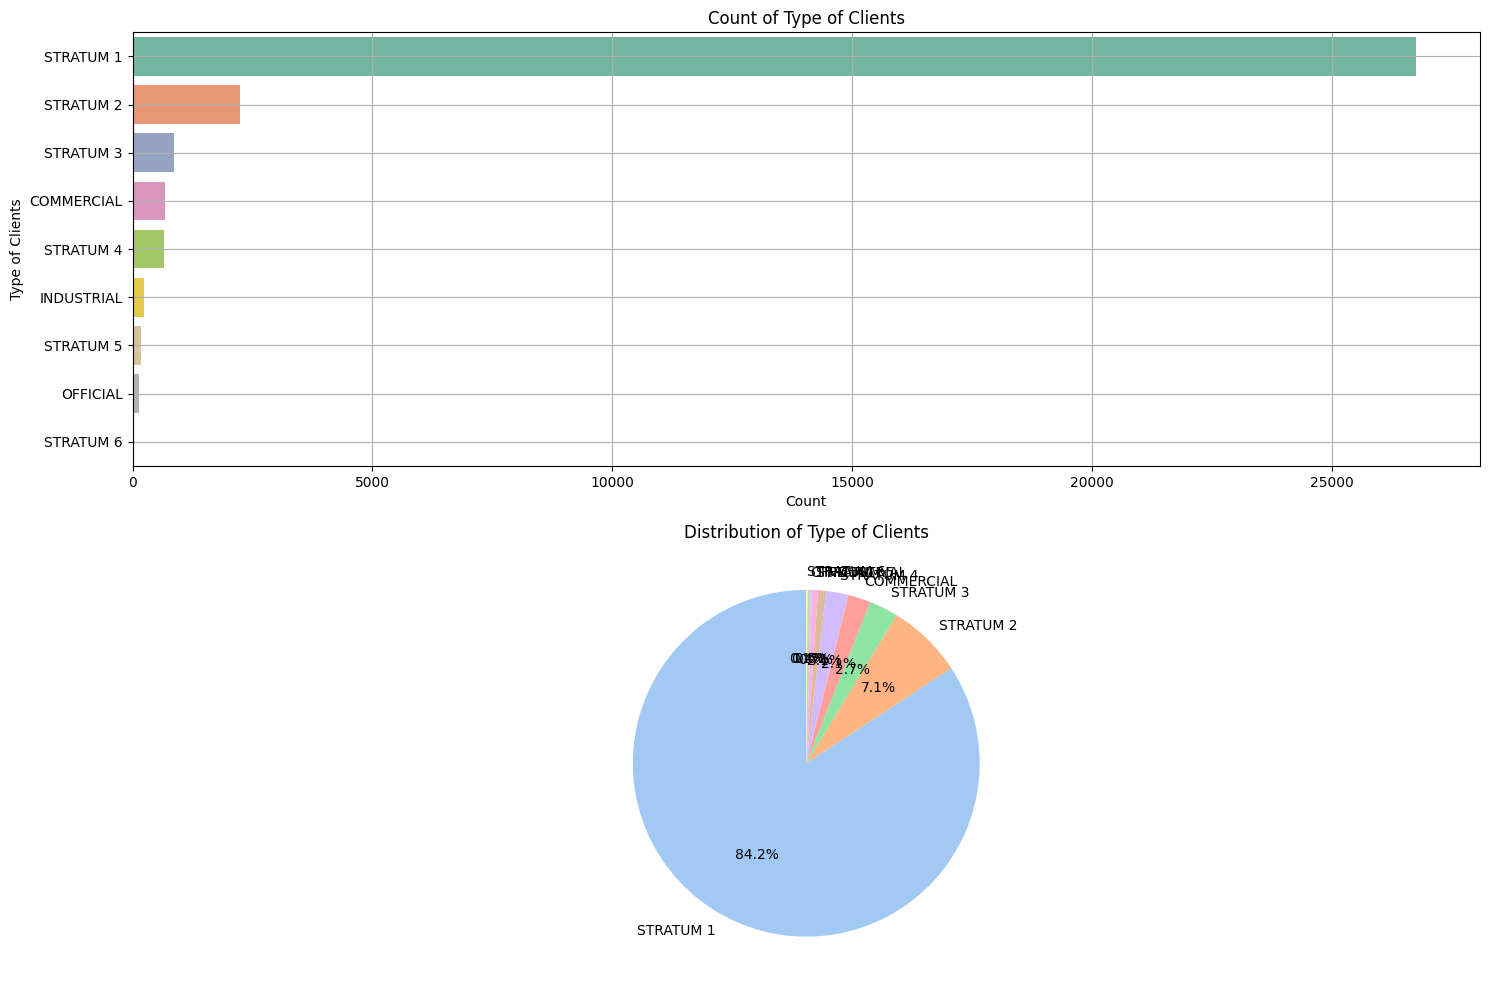

In [70]:
# Type of Clients

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
#Count plotaxs[0]
sns.countplot(y=df['Type of clients'], palette='Set2', order=df['Type of clients'].value_counts().index,ax=axs[0])
axs[0].set_title('Count of Type of Clients')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Type of Clients')
axs[0].grid(True)

#Pie chart
df['Type of clients'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90,ax=axs[1])
axs[1].set_title('Distribution of Type of Clients')
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()


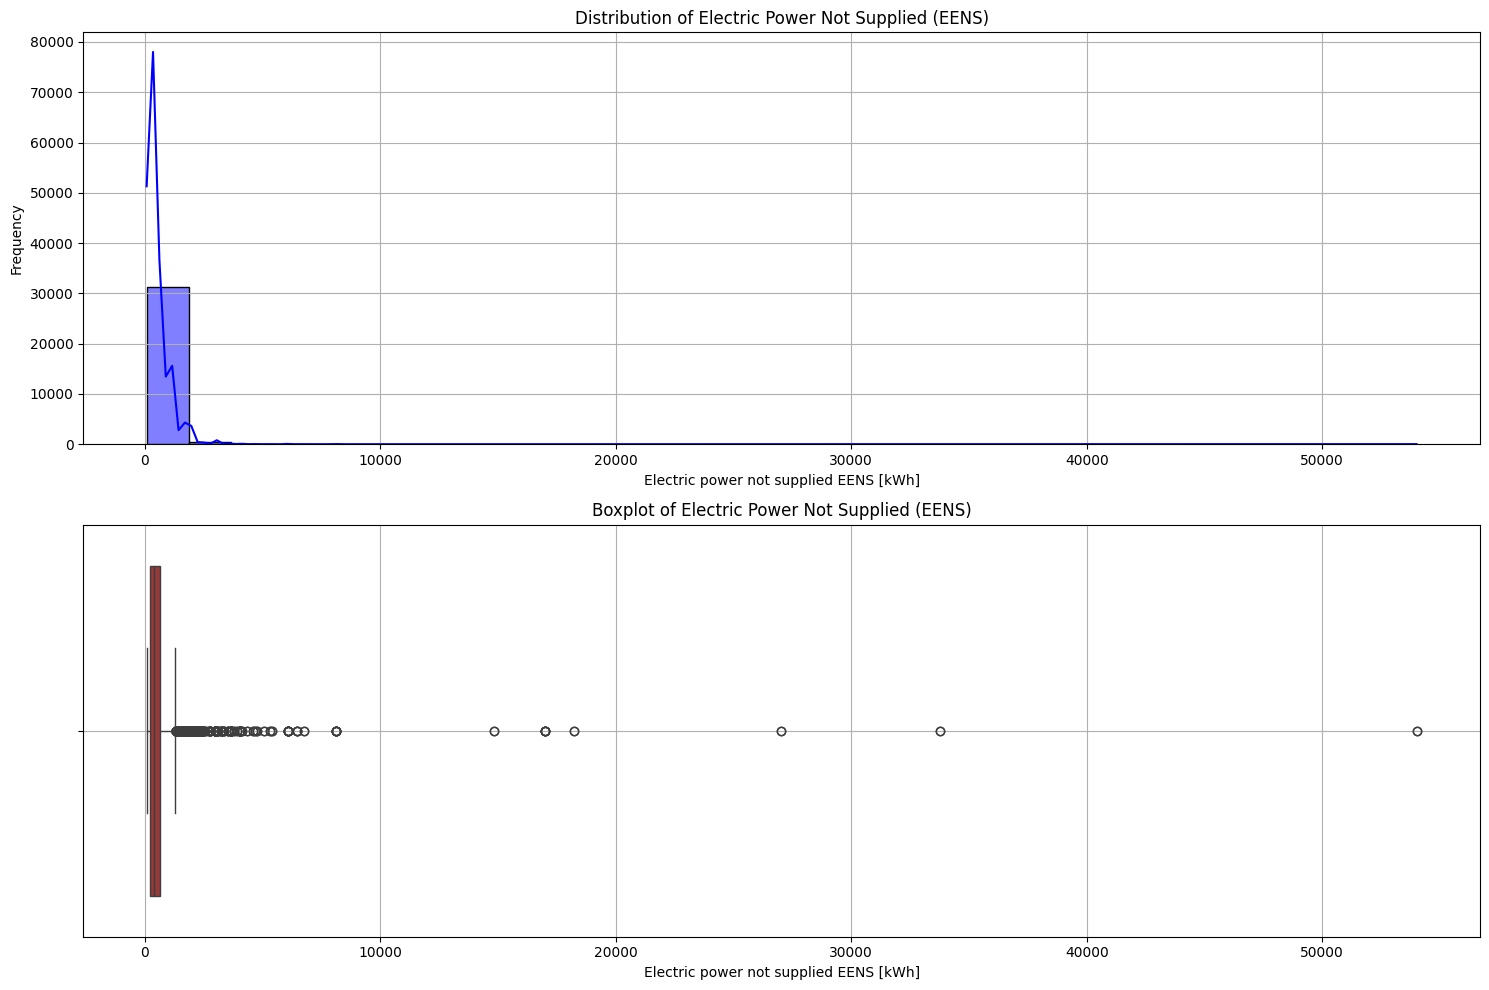

In [71]:
# Electric power not supplied EENS [kWh]

fig,axs=plt.subplots(2,1,figsize=(15,10))
sns.histplot(df['Electric power not supplied EENS [kWh] '], kde=True, bins=30, color='blue',ax=axs[0])
axs[0].set_title('Distribution of Electric Power Not Supplied (EENS)')
axs[0].set_xlabel('Electric power not supplied EENS [kWh]')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

sns.boxplot(x=df['Electric power not supplied EENS [kWh] '], color='brown',ax=axs[1])
axs[1].set_title('Boxplot of Electric Power Not Supplied (EENS)')
axs[1].set_xlabel('Electric power not supplied EENS [kWh]')
axs[1].grid(True)

plt.tight_layout()
plt.show()


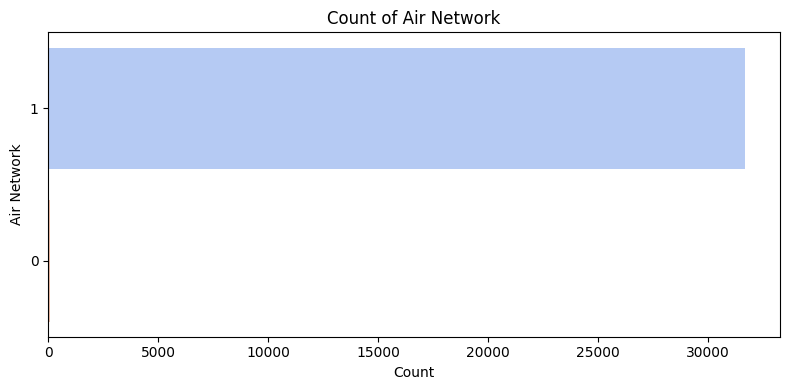

In [37]:
# Air Network

plt.figure(figsize=(8, 4))
sns.countplot(y=df['Air network'], palette='coolwarm', order=df['Air network'].value_counts().index)
plt.title('Count of Air Network')
plt.xlabel('Count')
plt.ylabel('Air Network')
plt.tight_layout()
plt.show()


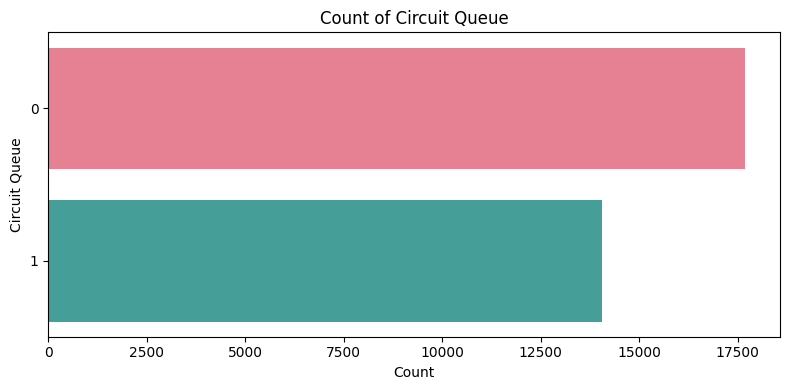

In [36]:
# Cirucuit Queue
plt.figure(figsize=(8, 4))
sns.countplot(y=df['Circuit Queue'], palette='husl', order=df['Circuit Queue'].value_counts().index)
plt.title('Count of Circuit Queue')
plt.xlabel('Count')
plt.ylabel('Circuit Queue')
plt.tight_layout()
plt.show()


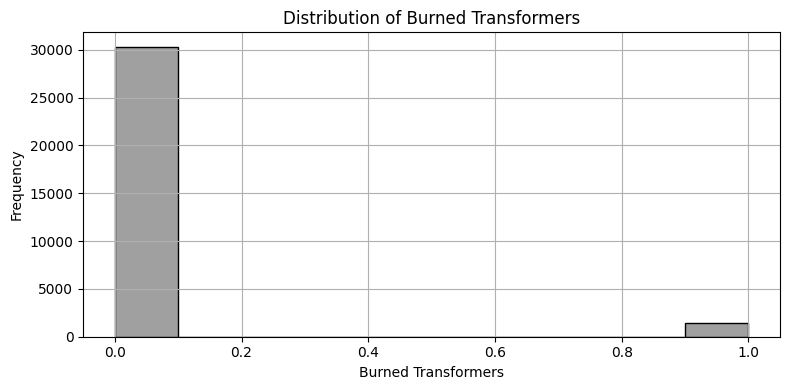

In [74]:
# Burned Transformer 2020

plt.figure(figsize=(8, 4))
sns.histplot(df['Burned transformer'], kde=False, bins=10, color='grey')
plt.title('Distribution of Burned Transformers')
plt.xlabel('Burned Transformers')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


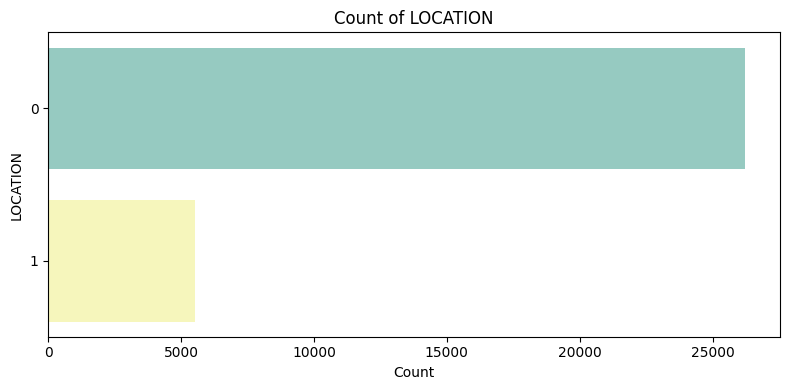

In [41]:
#  Location

plt.figure(figsize=(8, 4))
sns.countplot(y=df['LOCATION'], order=df['LOCATION'].value_counts().index, palette='Set3')
plt.title('Count of LOCATION')
plt.xlabel('Count')
plt.ylabel('LOCATION')
plt.tight_layout()
plt.show()


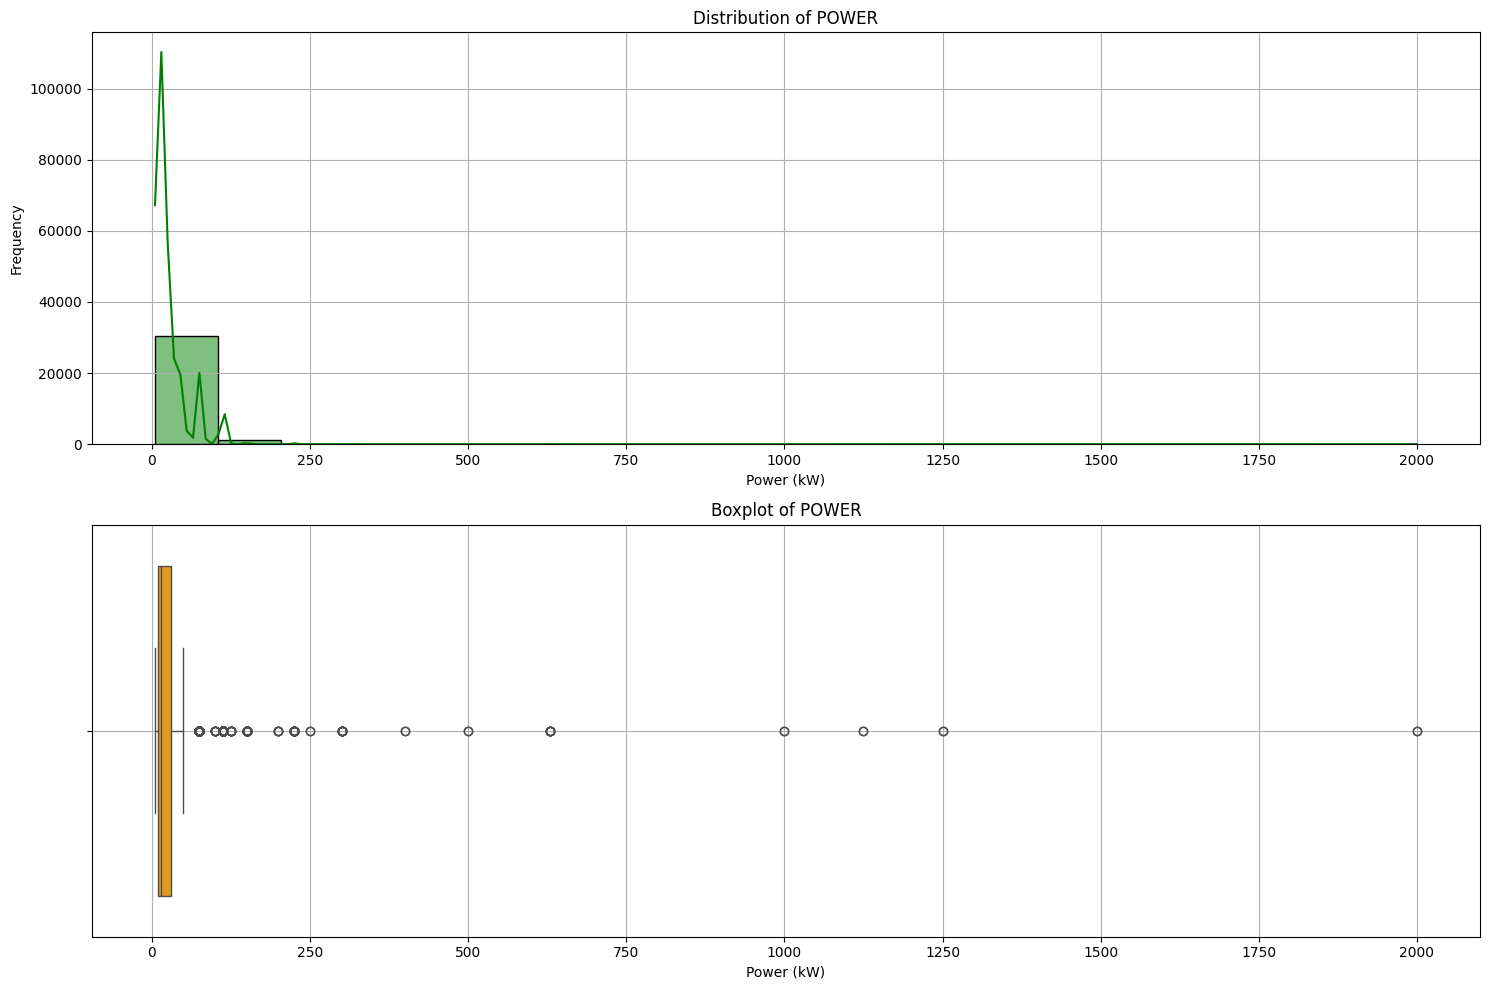

In [75]:
# Power

fig,axs=plt.subplots(2,1,figsize=(15,10))
#histogram
sns.histplot(df['POWER'], bins=20, kde=True, color='green',ax=axs[0])
axs[0].set_title('Distribution of POWER')
axs[0].set_xlabel('Power (kW)')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

#boxplot
sns.boxplot(x=df['POWER'], color='orange',ax=axs[1])
axs[1].set_title('Boxplot of POWER')
axs[1].set_xlabel('Power (kW)')
axs[1].grid(True)

plt.tight_layout()
plt.show()


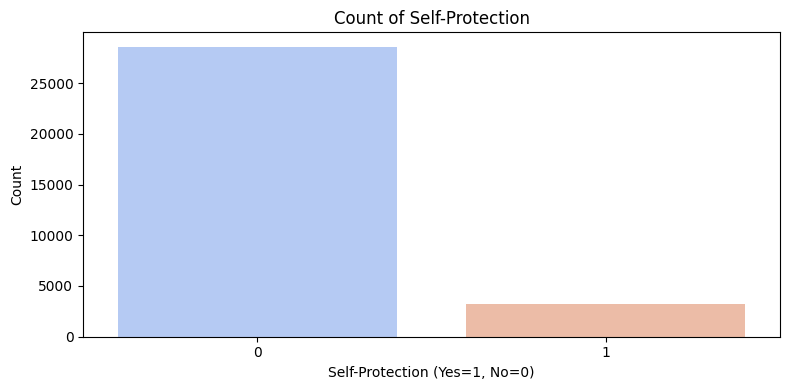

In [45]:
# Self protetcion

plt.figure(figsize=(8, 4))
sns.countplot(x=df['SELF-PROTECTION'], palette='coolwarm')
plt.title('Count of Self-Protection')
plt.xlabel('Self-Protection (Yes=1, No=0)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


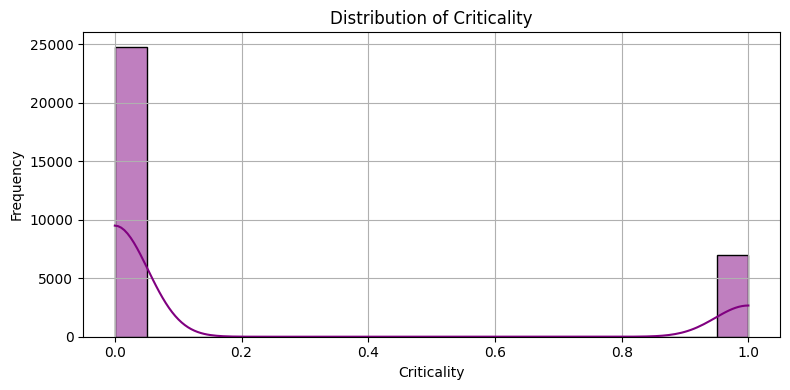

In [46]:
# Criticality according to previous study per ceramics level

plt.figure(figsize=(8, 4))
sns.histplot(df['Criticality according to previous study for ceramics level'], kde=True, bins=20, color='purple')
plt.title('Distribution of Criticality')
plt.xlabel('Criticality')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


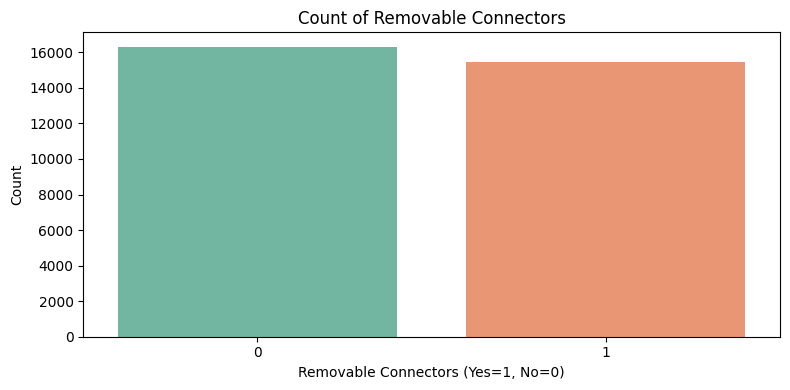

In [48]:
# removable connectors

plt.figure(figsize=(8, 4))
sns.countplot(x=df['Removable connectors'], palette='Set2')
plt.title('Count of Removable Connectors')
plt.xlabel('Removable Connectors (Yes=1, No=0)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


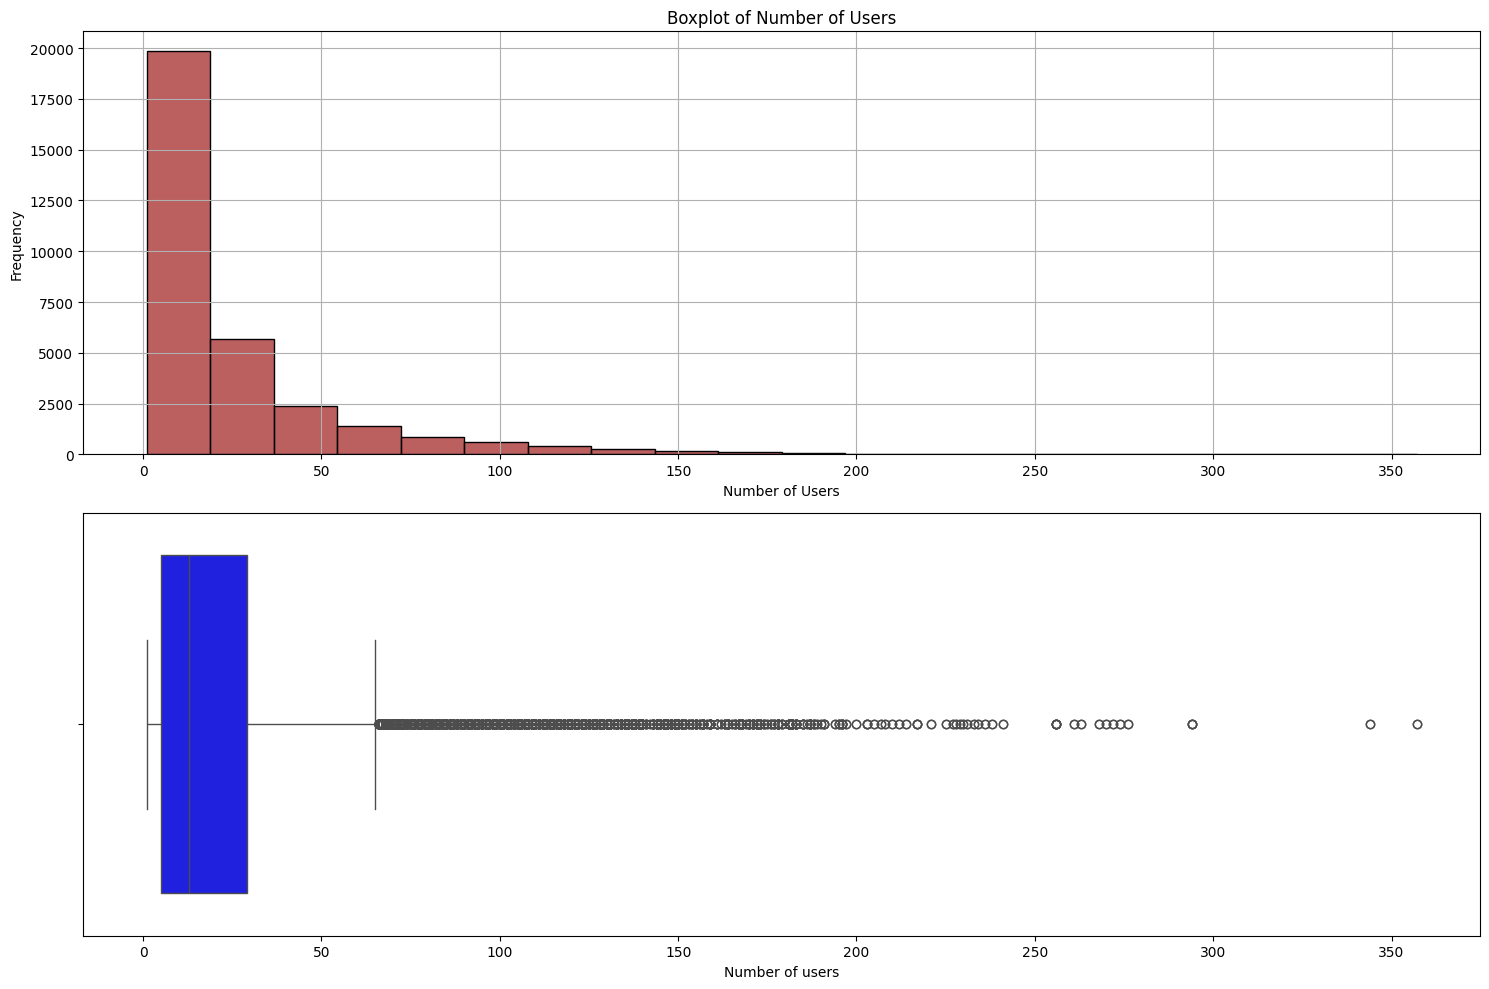

In [76]:
# No. of users
fig,axs=plt.subplots(2,1,figsize=(15,10))
#Histogram
sns.histplot(df['Number of users'], kde=False, bins=20, color='brown',ax=axs[0])
axs[0].set_title('Distribution of Number of Users')
axs[0].set_xlabel('Number of Users')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

#boxplot
sns.boxplot(x=df['Number of users'], color='blue')
axs[0].set_title('Boxplot of Number of Users')
axs[0].set_xlabel('Number of Users')
axs[0].grid(True)


plt.tight_layout()
plt.show()


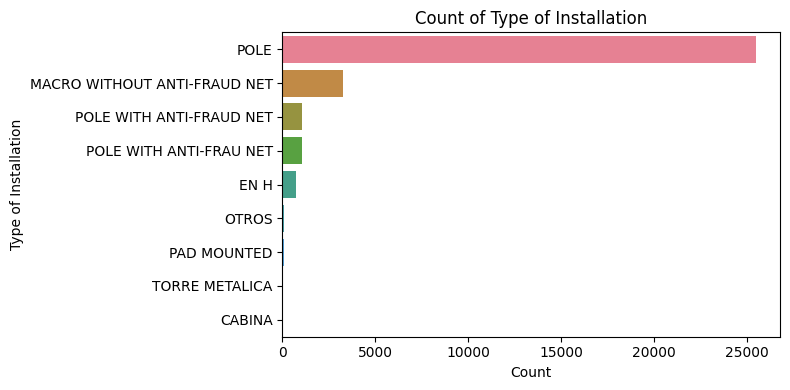

In [51]:
# Type of installation

plt.figure(figsize=(8, 4))
sns.countplot(y=df['Type of installation'], order=df['Type of installation'].value_counts().index, palette='husl')
plt.title('Count of Type of Installation')
plt.xlabel('Count')
plt.ylabel('Type of Installation')
plt.tight_layout()
plt.show()


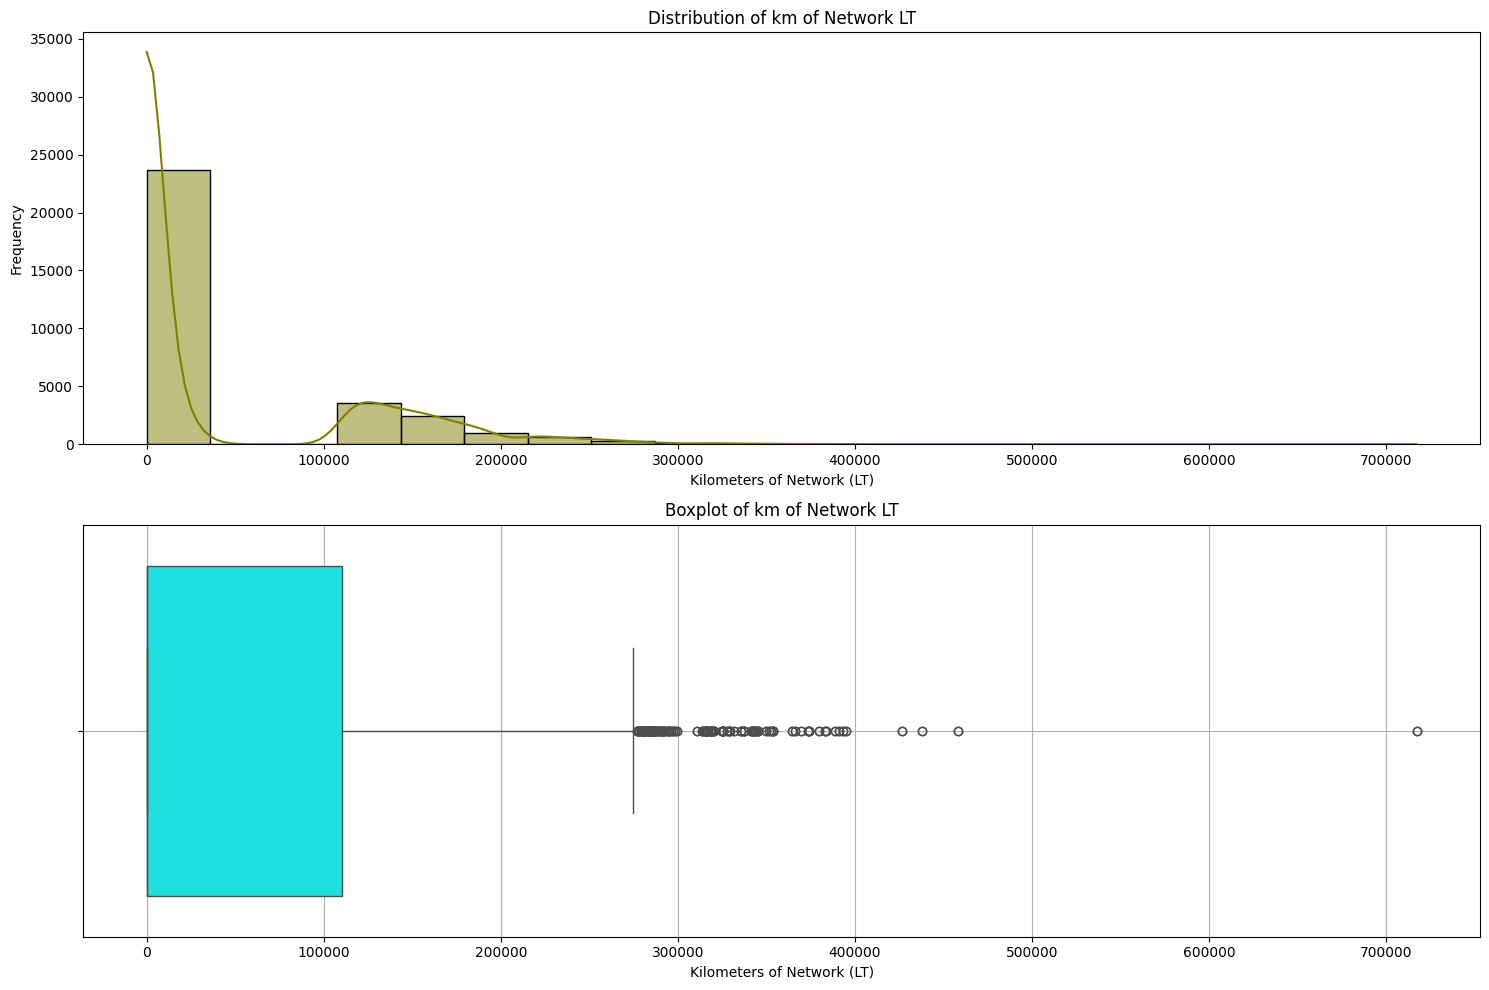

In [77]:
# km of network LT
fig,axs=plt.subplots(2,1,figsize=(15,10))
#Histogram
sns.histplot(df['km of network LT:'], kde=True, bins=20, color='olive',ax=axs[0])
axs[0].set_title('Distribution of km of Network LT')
axs[0].set_xlabel('Kilometers of Network (LT)')
axs[0].set_ylabel('Frequency')

#boxplot
sns.boxplot(x=df['km of network LT:'], color='cyan',ax=axs[1])
axs[1].set_title('Boxplot of km of Network LT')
axs[1].set_xlabel('Kilometers of Network (LT)')
plt.grid(True)

plt.tight_layout()
plt.show()
